In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from script import project_functions
url="../data/raw/13100762.csv"
df = project_functions.load_and_process(url)

df.to_csv("../data/processed/13100762_cleaned.csv", index = False)
df

,REF_DATE,GEO,Sex,Characteristics,Primary_Types,Stage
0,2011,Newfoundland and Labrador,Both sexes,Total number of cancer cases,Colon and rectum,All stages combined
1,2011,Newfoundland and Labrador,Both sexes,Cancer incidence rate,Colon and rectum,All stages combined
2,2011,Newfoundland and Labrador,Both sexes,"Low 95% confidence interval, cancer incidence ...",Colon and rectum,All stages combined
3,2011,Newfoundland and Labrador,Both sexes,"High 95% confidence interval, cancer incidence...",Colon and rectum,All stages combined
4,2011,Newfoundland and Labrador,Both sexes,Total number of cancer cases,Colon and rectum,Stage 0
...,...,...,...,...,...,...
36811,2017,Nunavut,Females,Total number of cancer cases,Colon and rectum,All stages combined
36812,2017,Nunavut,Females,Total number of cancer cases,Colon and rectum,All stages combined
36813,2017,Nunavut,Females,Total number of cancer cases,Colon and rectum,All stages combined
36814,2017,Nunavut,Females,Total number of cancer cases,Colon and rectum,Stage 0


Text(16.10649305555556, 0.5, 'No. of Cases')

<Figure size 1800x576 with 0 Axes>

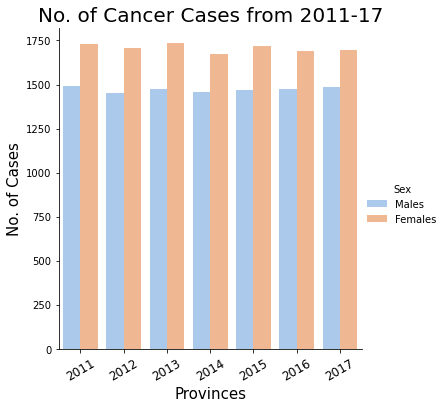

In [5]:
df_mf = df.loc[~df.Sex.str.contains("Both sexes")]
plt.figure(figsize=(25,8))

ax=sns.catplot(data=df_mf, x="REF_DATE", kind="count", hue="Sex", palette="pastel")

plt.title("No. of Cancer Cases from 2011-17", loc='center',  fontdict={'fontsize': 20})
ax.set_xticklabels(rotation=30, fontdict={'fontsize': 12})

plt.xlabel("Provinces", loc='center',  fontdict={'fontsize': 15})
plt.ylabel("No. of Cases", loc='center',  fontdict={'fontsize': 15})
plt.savefig("../images/Cancer Cases 2011-17")

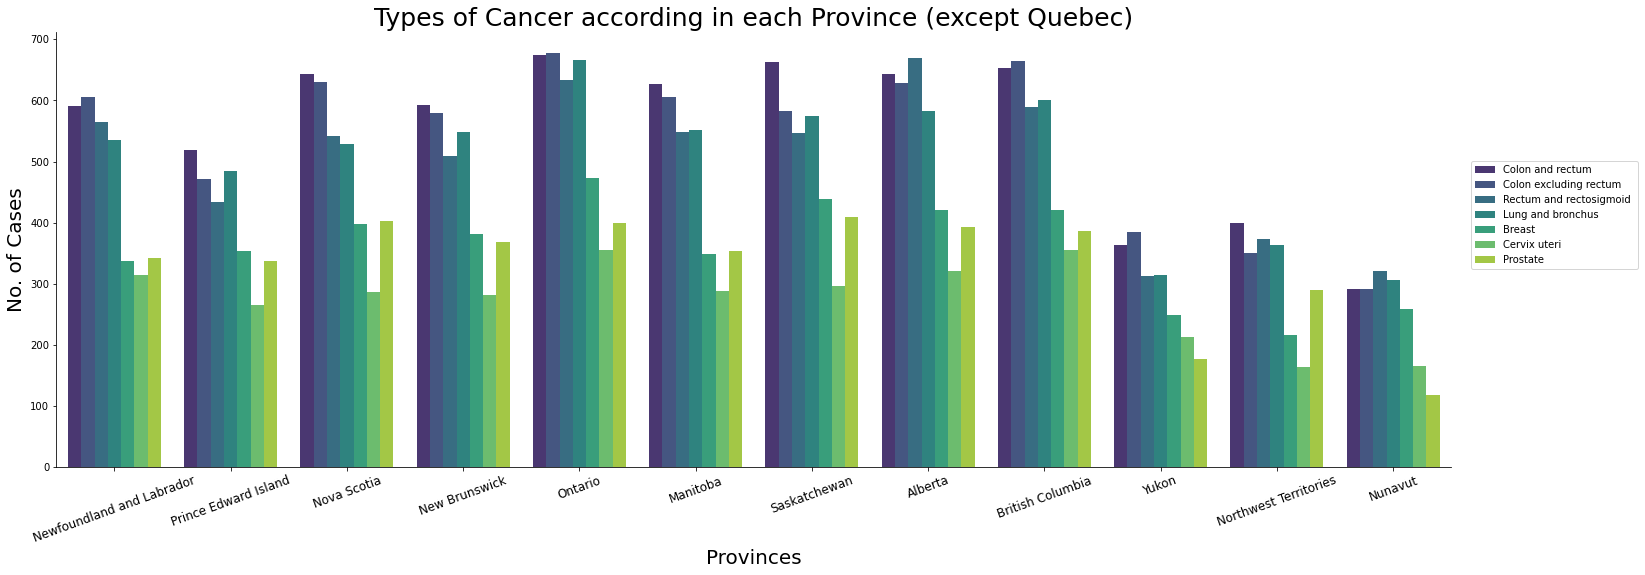

In [11]:
plt.figure(figsize=(25,8))

ax=sns.countplot(data=df, hue="Primary_Types", x="GEO", palette="viridis")
plt.legend(bbox_to_anchor=(1,0.75), borderaxespad=2)
plt.title("Types of Cancer according in each Province (except Quebec)", loc='center',  fontdict={'fontsize': 25})
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, fontdict={'fontsize': 12})
ax.set_ylabel("No. of Cases", loc='center',  fontdict={'fontsize': 20})
ax.set_xlabel("Provinces", loc='center',  fontdict={'fontsize': 20})
sns.despine()

plt.savefig("../images/Cancer Cases by Province")

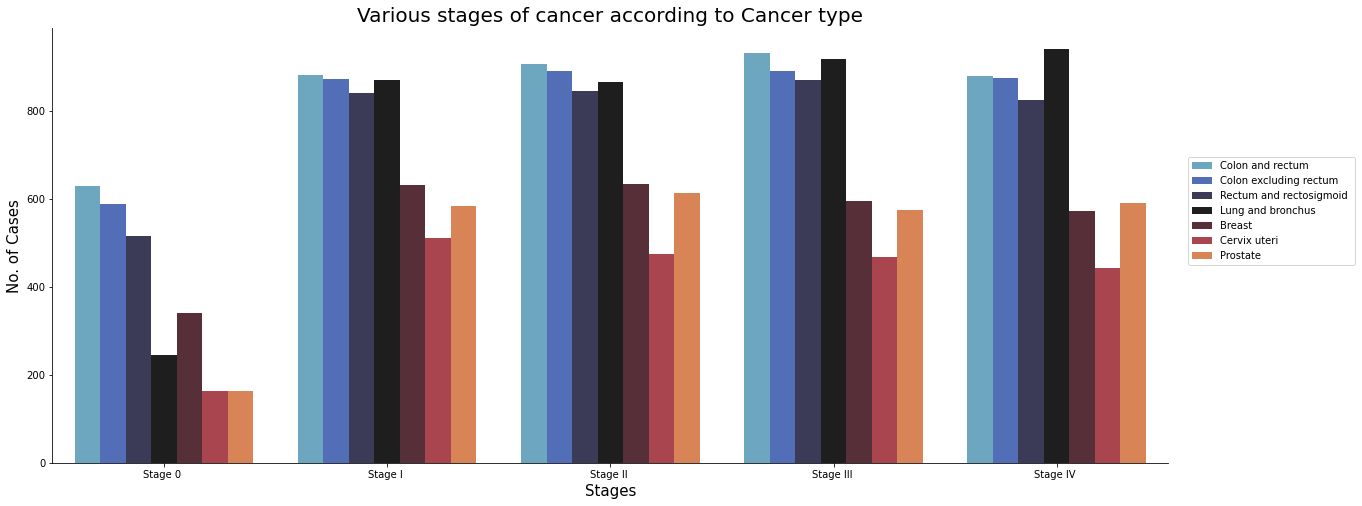

In [12]:
df2 = df.loc[~df.Stage.str.contains("Stage not available")].loc[~df.Stage.str.contains("Stage unknown")].loc[~df.Stage.str.contains("All stages combined")]

plt.figure(figsize=(20,8))
ax=sns.countplot(data=df2, hue="Primary_Types", x="Stage", palette="icefire")

plt.legend(bbox_to_anchor=(1,0.75), borderaxespad=2)
plt.title("Various stages of cancer according to Cancer type", loc='center',  fontdict={'fontsize': 20})
ax.set_ylabel("No. of Cases", loc='center',  fontdict={'fontsize': 15})
ax.set_xlabel("Stages", loc='center',  fontdict={'fontsize': 15})
sns.despine()

plt.savefig("../images/Cancer Types in different stages")